<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Life_Expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [73]:
df = pd.read_csv('Life Expectancy Data.csv')

In [74]:
df.sample(5)

Country  Year      Status  Life expectancy   \
1223  Iran (Islamic Republic of)  2010  Developing              74.1   
1996                    Paraguay  2010  Developing              73.2   
685                       Cyprus  2003   Developed              78.5   
2794    United States of America  2015   Developed              79.3   
1763                     Morocco  2000  Developing              68.6   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
1223             16.0             22     0.03                 0.00000   
1996            152.0              3     5.65               359.97604   
685              66.0              0    10.62               158.70874   
2794             13.0             23      NaN                 0.00000   
1763             16.0             27     0.45                63.42140   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
1223         99.0       538  ...   99.0               8.20         99.0   
1996         89.0         0  ...   85.0               9.10         89.0   
685          88.0         0  ...   98.0               6.83         98.0   
2794         92.0       188  ...   93.0                NaN         95.0   
1763         43.0      7368  ...   95.0               4.18         95.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
1223        0.1          NaN         NaN                    7.8   
1996        0.1  3225.591754    629877.0                    2.1   
685         0.1  2293.478900    993563.0                    0.9   
2794        0.1          NaN         NaN                    0.8   
1763        0.1  1332.382358  28849621.0                    6.7   

       thinness 5-9 years  Income composition of resources  Schooling  
1223                  8.0                            0.735       12.9  
1996                  2.0                            0.664       12.4  
685                   1.0                            0.815       13.0  
2794                  0.6                              NaN        NaN  
1763                  6.6                            0.519        8.0  

[5 rows x 22 columns]

In [75]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [76]:
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [77]:
df.shape

(2938, 22)

In [78]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [80]:
df['Life expectancy '].corr(df['GDP'])

0.46145519262073803

# Data Cleaning

In [81]:
df.corr()['Life expectancy ']

<ipython-input-81-98f4ade10d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Life expectancy ']


Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

Alcohol, percentage expenditure, Hepatitis B, BMI, Polio, Total expenditure, Diptheria, GDP, Income composition of resources, Schooling.


In [82]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [83]:
# Calculate the average value of the column
column_average = df['Schooling'].mean()

# Replace null values with the column average
df['Schooling'].fillna(column_average, inplace=True)


In [84]:
columns_to_replace = ['Income composition of resources','GDP', ' BMI ', 'Diphtheria ', 'Total expenditure', 'Polio', 'Hepatitis B', 'percentage expenditure', 'Alcohol','Life expectancy ']  # Replace with the names of the columns

# Calculate the average values for the selected columns
column_averages = df[columns_to_replace].mean()

# Replace null values with the column averages
df[columns_to_replace] = df[columns_to_replace].fillna(column_averages)


# EDA

In [116]:
df.sample(2)

Country  Year      Status  Life expectancy   Adult Mortality  \
2183  Saint Lucia  2000  Developing              71.6            183.0   
1967       Panama  2007  Developing              76.4            124.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2183              0    11.69                0.000000    80.940461         0   
1967              1     6.16               76.250804    85.000000         0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
2183  ...    7.0               5.53          7.0        0.4  7483.158469   
1967  ...   84.0               6.31         85.0        0.2   668.866700   

      Population   thinness  1-19 years   thinness 5-9 years  \
2183         NaN                    4.5                  4.5   
1967    345387.0                    2.1                  2.0   

      Income composition of resources  Schooling  
2183                            0.000       12.8  
1967                            0.743       12.9  

[2 rows x 22 columns]

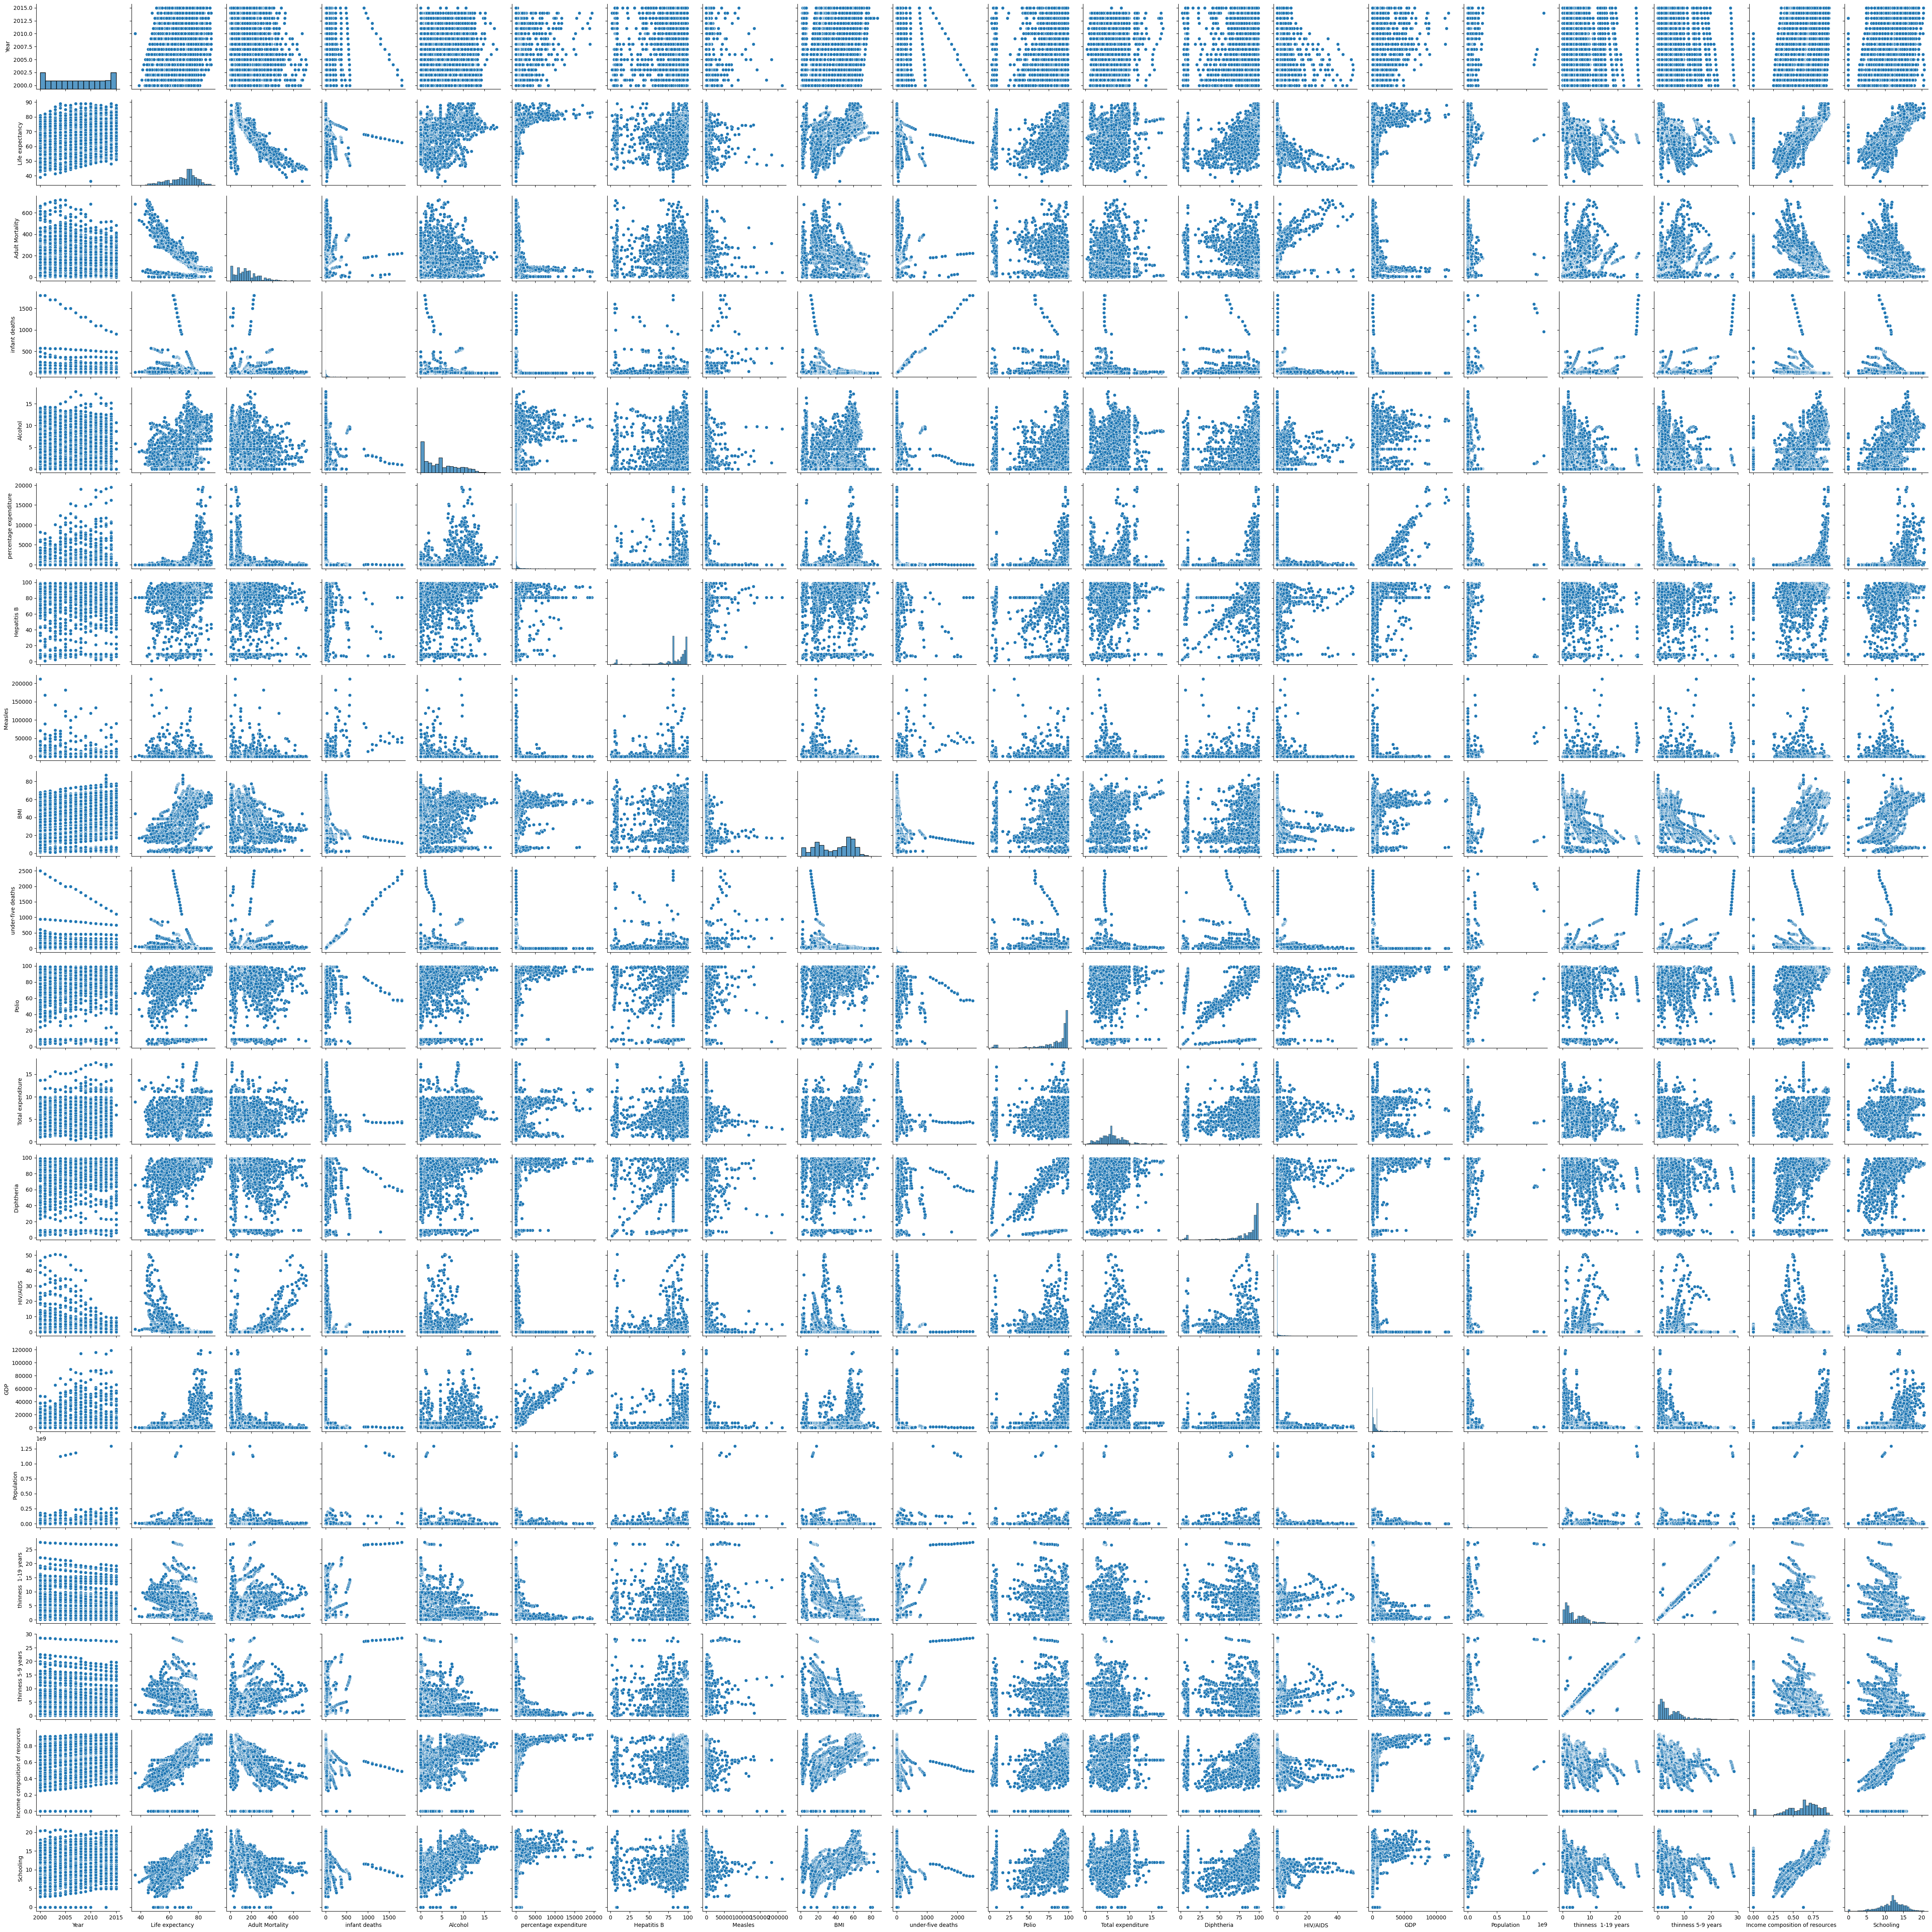

In [117]:
sns.pairplot(df)

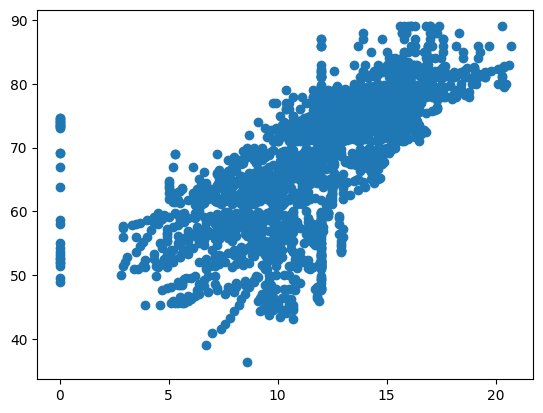

In [123]:
plt.scatter(df['Schooling'], df['Life expectancy '] )

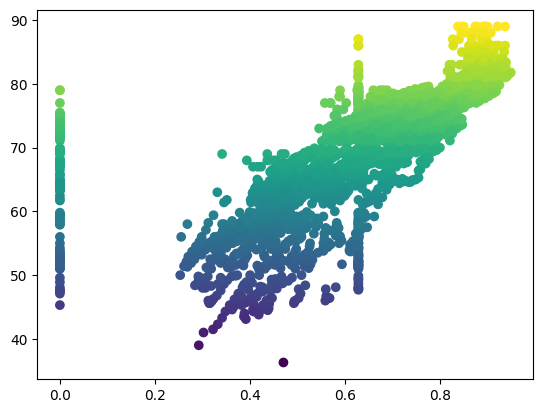

In [129]:
plt.scatter(df['Income composition of resources'], df['Life expectancy '], c=y)

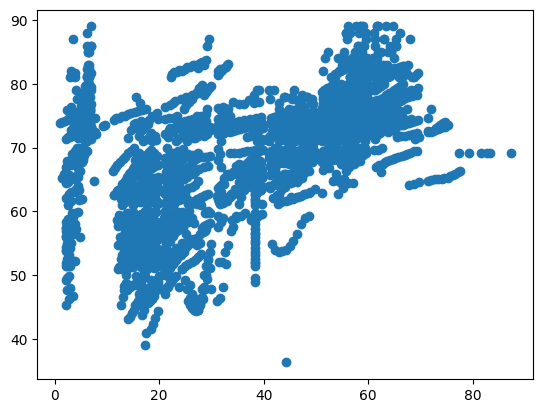

In [132]:
plt.scatter(df[' BMI '], df['Life expectancy '])

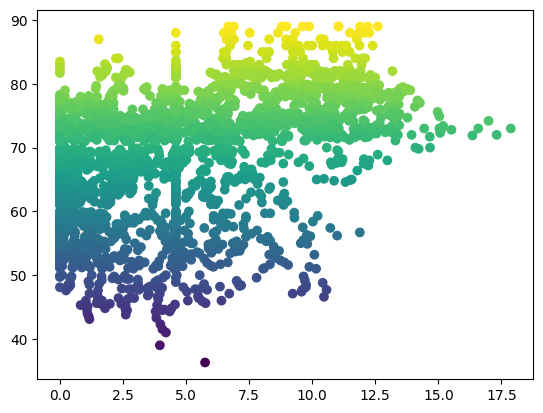

In [128]:
plt.scatter(df['Alcohol'], df['Life expectancy '], c=y)

# Prediction

In [85]:
X = df[['Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ','Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy ']

In [86]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3)

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(r2_score(y_test, y_pred)*100)

61.64852389922402


In [96]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print(r2_score(y_test, y_pred)*100)

23.922291578917353


In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(r2_score(y_test, y_pred)*100)

79.13985293326404


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred)*100)

88.99867672405816


In [110]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [111]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim = 10))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=36)
y_pred = model.predict(X_test)
print('R2_Score is ',r2_score(y_test, y_pred))

Epoch 1/100
58/58 [==============================] - 2s 5ms/step - loss: 20.8557 - accuracy: 0.0000e+00
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 20.8119 - accuracy: 0.0000e+00
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 20.6000 - accuracy: 0.0000e+00
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 20.6649 - accuracy: 0.0000e+00
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 20.4826 - accuracy: 0.0000e+00
Epoch 6/100
58/58 [==============================] - 0s 6ms/step - loss: 20.4816 - accuracy: 0.0000e+00
Epoch 7/100
58/58 [==============================] - 0s 6ms/step - loss: 20.4006 - accuracy: 0.0000e+00
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 20.3415 - accuracy: 0.0000e+00
Epoch 9/100
58/58 [==============================] - 0s 4ms/step - loss: 20.1394 - accuracy: 0.0000e+00
Epoch 10/100
58/58 [==============================] - 0s 3ms/ste